In [1]:
# Main aim is to understand more about the data
# Data Analysis Phase

# Basic Library
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

obese = pd.read_csv('Obesity Classification.csv')
obese.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [2]:
obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [3]:
obese.shape

(108, 7)

In [4]:
obese.isnull().sum() #No Null Values

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [5]:
obese['Age'].value_counts()
obese['Gender'].value_counts()
obese['Height'].value_counts()
obese['Weight'].value_counts()
obese['BMI'].value_counts()
obese['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

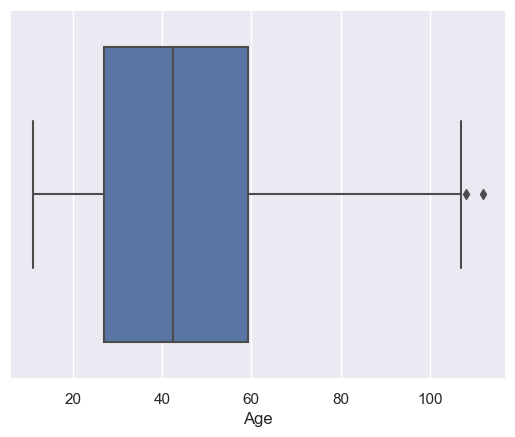

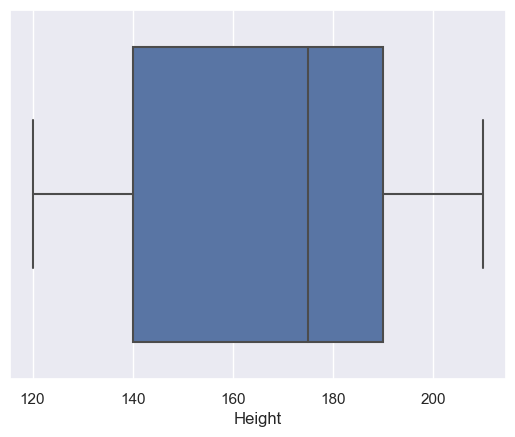

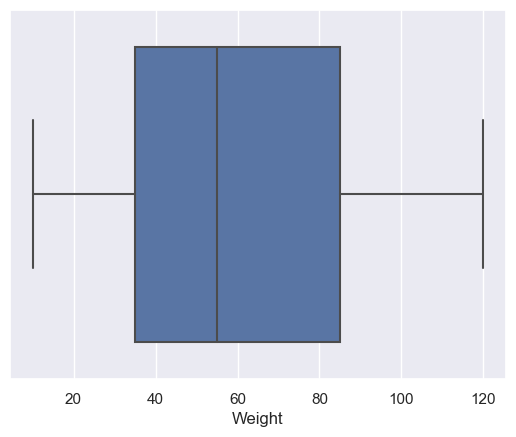

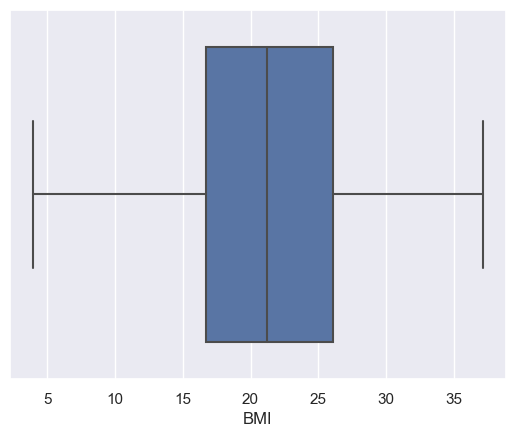

In [6]:
#Checking for Outliers
sns.boxplot(x=obese['Age'])
plt.show()
sns.boxplot(x=obese['Height'])
plt.show()
sns.boxplot(x=obese['Weight'])
plt.show()
sns.boxplot(x=obese['BMI'])
plt.show()

In [7]:
#Encoding gender:
obese['Gender'].value_counts()

obese['Gender']=obese['Gender'].astype('category')
obese['Gender']=obese['Gender'].cat.codes

In [8]:
#Encoding Label
obese = pd.get_dummies(obese, columns=['Label'])


In [9]:
obese.head()
#Drop Id and Underweight

obese.drop(['ID','Label_Underweight'],axis=1,inplace=True)

In [10]:
obese.head()

,Age,Gender,Height,Weight,BMI,Label_Normal Weight,Label_Obese,Label_Overweight
0,25,1,175,80,25.3,1,0,0
1,30,0,160,60,22.5,1,0,0
2,35,1,180,90,27.3,0,0,1
3,40,0,150,50,20.0,0,0,0
4,45,1,190,100,31.2,0,1,0


In [13]:
#Splitting the data into dependant and independant variables
x=obese[['Age','Gender','Height','Weight','BMI']]


In [14]:
y=obese[['Label_Normal Weight','Label_Obese','Label_Overweight']]

In [15]:
x.head()

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2


In [16]:
y.head()

,Label_Normal Weight,Label_Obese,Label_Overweight
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,1,0


In [17]:
#Split the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(81, 5) (27, 5) (81, 3) (27, 3)


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)


In [23]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41
 samples avg       0.51      0.51      0.51        41

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
 samples avg       0.74      0.74      0.74        20

1.0
1.0


In [24]:
#Over fitting with Decision Tree 

#Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_train1 = rf.predict(x_train)
y_pred_test1 = rf.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train,y_pred_train1))
print(classification_report(y_test,y_pred_test1))

print(accuracy_score(y_train,y_pred_train1))
print(accuracy_score(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41
 samples avg       0.51      0.51      0.51        41

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
 samples avg       0.74      0.74      0.74        20

1.0
1.0
